# **Titanic prediction model**

## importing libraries

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, cross_val_predict

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## read the data

In [212]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [213]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Performing Data Cleaning and Analysis

<br>**Variable        Description**</br>
1. Survived	- Survived (1) or died (0)
2. Pclass -	Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. Name	- Passenger’s name
4. Sex -	Passenger’s sex
5. Age	- Passenger’s age
6. SibSp -	Number of siblings/spouses aboard
7. Parch -	Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
8. Ticket -	Ticket number
9. Fare -	Fare
10. Cabin -	Cabin
11. Embarked -	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [215]:
'''
Deleting the unnecessary columns which are not related to predicting the person liveness
'''
del train['PassengerId']
del train['Ticket']
del train['Fare']
del train['Cabin']
del train['Name']


In [216]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [217]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [218]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [219]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [220]:
"""
Similarly, deleting the columns not required for determining the survival of a person for the data stored in test.csv
"""

del test['Ticket']
del test['Fare']
del test['Cabin']
del test['Name']

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [221]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch
count,418.000000,418.000000,332.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344
std,120.810458,0.841838,14.181209,0.896760,0.981429
min,892.000000,1.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000


In [222]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [223]:
"""
Turning the Sex columns into the numerical value
Male = 1
Female = 2
"""
def change(str):
    if str == 'male':
        return '1'
    elif str == 'female':
        return '2'
    
train['Gender'] = train['Sex'].apply(change)
test['Gender'] = test['Sex'].apply(change)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,2
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


In [224]:
del train['Sex']
del test['Sex']

In [225]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,2
2,1,3,26.0,0,0,S,2
3,1,1,35.0,1,0,S,2
4,0,3,35.0,0,0,S,1


In [226]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked,Gender
0,892,3,34.5,0,0,Q,1
1,893,3,47.0,1,0,S,2
2,894,2,62.0,0,0,Q,1
3,895,3,27.0,0,0,S,1
4,896,3,22.0,1,1,S,2


In [227]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [228]:
train[['Gender', 'Survived']].groupby(['Gender']).mean().sort_values(by='Survived', ascending=False)

,Survived
Gender,
2,0.742038
1,0.188908


In [229]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


## Analyzing Data by Visualization


<Axes: ylabel='count'>

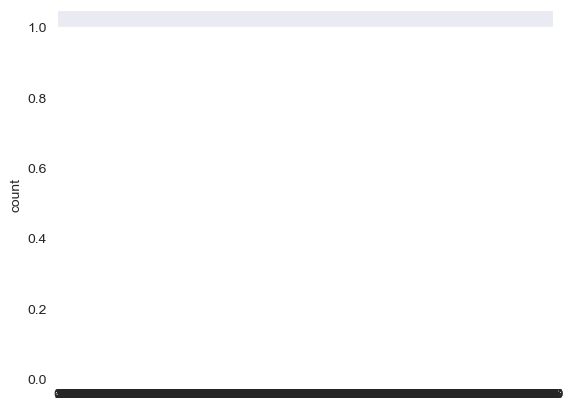

In [230]:
train['Survived'] = train['Survived']
sns.countplot(train['Survived'])

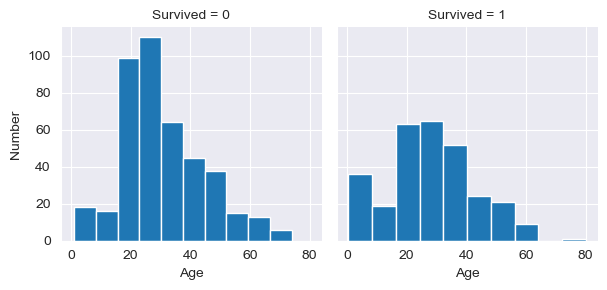

In [231]:
age_hist = sns.FacetGrid(train, col='Survived')
age_hist.map(plt.hist, 'Age')
age_hist.set_ylabels('Number')

**plot shows that people from 20-30 are mostly people who are dead whereas among those who survived, 
the number of infants are much higher than teenagers.**

## Number of people who survived based on age and passenger class

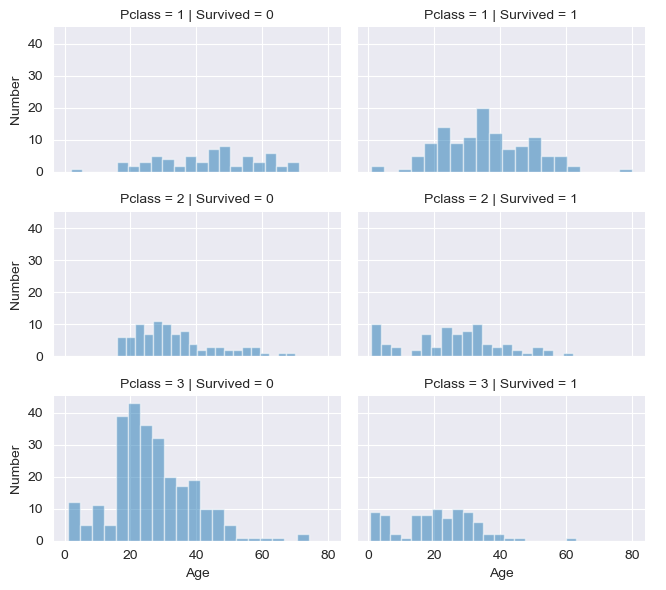

In [232]:
pclass_age = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.0, aspect=1.6)
pclass_age.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age.add_legend()
pclass_age.set_ylabels('Number')

## Handling the NULL values in the column Age

#### We have NULL value inplace of Age for some of the people in both training and testing data.
#### So, one way is to fill them with the mean values i.e. fill the ones who have survived with the mean age of the survived people and similarly fill those who haven't survived with the mean age of all non-survived people.

#### But, this will only solve the problem for the training data and not for the testing data as we have to predict their survival status.

#### So, we can tackle the issue by creating an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.



In [233]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
 6   Gender    891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [234]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
    
train["Age"].isnull().sum()
# to check if there is any null value
print(train["Age"].isnull().sum())
print(test["Age"].isnull().sum())


0
0


In [235]:
# Rename the "Gender" column to "Sex" for both datasets
def rename_gender_column(dataset):
    dataset.rename(columns={'Gender': 'Sex'}, inplace=True)

rename_gender_column(train)
rename_gender_column(test)

# Remove rows with null values in the "Embarked" column
train.dropna(subset=['Embarked'], inplace=True)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,0,3,22,1,0,S,1
1,1,1,38,1,0,C,2
2,1,3,26,0,0,S,2
3,1,1,35,1,0,S,2
4,0,3,35,0,0,S,1


In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int64 
 1   Pclass    889 non-null    int64 
 2   Age       889 non-null    int32 
 3   SibSp     889 non-null    int64 
 4   Parch     889 non-null    int64 
 5   Embarked  889 non-null    object
 6   Sex       889 non-null    object
dtypes: int32(1), int64(4), object(2)
memory usage: 52.1+ KB


In [237]:
train['Family_Members'] = train['Parch'] + train['SibSp'] + 1
test['Family_Members'] = test['Parch'] + test['SibSp'] + 1

del train['SibSp']
del train['Parch']

del test['Parch']
del test['SibSp']

In [238]:
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,22,S,1,2
1,1,1,38,C,2,2
2,1,3,26,S,2,1
3,1,1,35,S,2,2
4,0,3,35,S,1,1


### Grouping the Age data

#### The age groups need to be converted into different sub-groups so that better prediction model can be formed

In [239]:
def categorize_age(age):
    if age <= 10:
        return 0
    elif age <= 20:
        return 1
    elif age <= 25:
        return 2
    elif age <= 30:
        return 3
    elif age <= 37:
        return 4
    elif age <= 45:
        return 5
    else:
        return 6

# Apply the age categorization to both train and test datasets
for dataset in [train, test]:
    dataset['Age'] = dataset['Age'].apply(categorize_age).astype(int)

# Display value counts of the categorized Age column
train['Age'].value_counts()

Age
4    166
2    157
1    151
3    134
5    117
6    100
0     64
Name: count, dtype: int64

In [240]:
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,S,1,2
1,1,1,5,C,2,2
2,1,3,3,S,2,1
3,1,1,4,S,2,2
4,0,3,4,S,1,1


In [241]:
test.head()

,PassengerId,Pclass,Age,Embarked,Sex,Family_Members
0,892,3,2,Q,1,1
1,893,3,5,S,2,2
2,894,2,3,Q,1,1
3,895,3,4,S,1,1
4,896,3,4,S,2,3


In [242]:
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].map({'C': 0, 'S': 1, 'Q': 2}).astype(int)
    
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,1,1,2
1,1,1,5,0,2,2
2,1,3,3,1,2,1
3,1,1,4,1,2,2
4,0,3,4,1,1,1


In [243]:
train[['Age','Survived']].groupby(['Age']).mean().sort_values(by='Survived', ascending=True)

,Survived
Age,
2,0.331210
1,0.350993
5,0.358974
6,0.370000
3,0.373134
4,0.409639
0,0.593750


In [244]:
train[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=True)

,Survived
Embarked,
1,0.336957
2,0.389610
0,0.553571


In [245]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.626168


### heatmap

<Axes: >

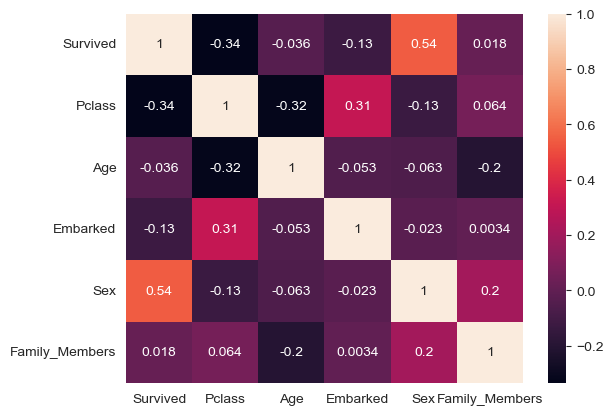

In [246]:
sns.heatmap(train.corr(), annot=True)

<Axes: >

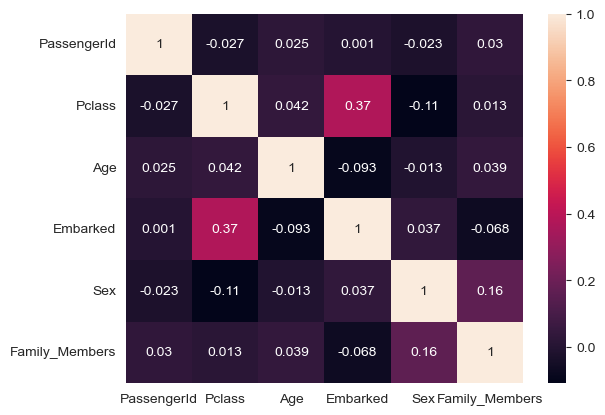

In [247]:
sns.heatmap(test.corr(), annot=True)

## Building Models for Prediction

#### Now we will train multiple Machine Learning algorithms over the training data to predict the survival on our testing data and analyze the results thus obtained.

#### We also use cross-validation in the end.

####  We know that since the survival is represented as either 0 or 1, therefore it is a Classification problem. The algorithms used for the same are:
##### Logistic Regression
##### Support Vector Machines
##### KNN or K-Nearest Neighbors
##### Decision Trees
##### Random Forest
##### Stochastic Gradient descent (SGD)
##### Gaussian Naive Bayes

In [248]:
test.head()

,PassengerId,Pclass,Age,Embarked,Sex,Family_Members
0,892,3,2,2,1,1
1,893,3,5,1,2,2
2,894,2,3,2,1,1
3,895,3,4,1,1,1
4,896,3,4,1,2,3


In [249]:
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,1,1,2
1,1,1,5,0,2,2
2,1,3,3,1,2,1
3,1,1,4,1,2,2
4,0,3,4,1,1,1


In [250]:
X_train= train.drop(['Survived'], axis =1)
y_train= train['Survived']

X_test=test.drop('PassengerId', axis=1).copy()
X_test.shape

(418, 5)

# Logistic Regression

In [251]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [252]:
y_pred = logistic_regression.predict(X_test)

In [253]:
log_reg_acc = round(logistic_regression.score(X_train,y_train), 2)
print(f'\nModel Accuracy: {log_reg_acc * 100:.2f} %')


Model Accuracy: 79.00 %


## Cross-Validation for Logistic Regression
#### Cross-Validation protects against overfitting.
#### It is a resampling method which tells us how well our model would generalize to unseen data. This is achieved by fixing a number of partitions of the dataset called folds, predicting each fold separately, and averaging the predictions in the end.

In [254]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

def evaluate_model(model, X_train, y_train, n_splits=10, random_state=2):
    """
    Evaluate a machine learning model using k-fold cross validation
    
    Parameters:
    -----------
    model : sklearn estimator
        The machine learning model to evaluate
    X_train : array-like
        Training features
    y_train : array-like
        Training labels
    n_splits : int, default=10
        Number of folds for cross-validation
    random_state : int, default=2
        Random state for reproducibility
    
    Returns:
    --------
    tuple
        (results dictionary containing all evaluation metrics, predictions array)
    """
    # Initialize K-Fold
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    
    # Calculate accuracy scores
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    mean_accuracy = scores.mean() * 100
    std_accuracy = scores.std() * 100
    
    # Get predictions for confusion matrix and other metrics
    predictions = cross_val_predict(model, X_train, y_train, cv=kf)
    
    # Calculate other metrics
    conf_matrix = confusion_matrix(y_train, predictions)
    precision = round(precision_score(y_train, predictions) * 100, 2)
    recall = round(recall_score(y_train, predictions) * 100, 2)
    f1 = round(f1_score(y_train, predictions) * 100, 2)
    
    # Store all results in a dictionary
    results = {
        'individual_scores': scores * 100,
        'mean_accuracy': mean_accuracy,
        'std_accuracy': std_accuracy,
        'confusion_matrix': conf_matrix,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    # Print results
    print(f'Scores: {results["individual_scores"]}%')
    print(f'Mean: {results["mean_accuracy"]}%')
    print(f'Standard Deviation: {results["std_accuracy"]}%\n')
    print(f'Confusion Matrix:\n{results["confusion_matrix"]}\n')
    print(f'Precision: {results["precision"]}%')
    print(f'Recall: {results["recall"]}%')
    print(f'F1 Score: {results["f1_score"]}%')
    
    return results, predictions

Scores: [76.40449438 79.7752809  92.13483146 75.28089888 71.91011236 74.15730337
 78.65168539 75.28089888 83.14606742 84.09090909]%
Mean: 79.08324821246168%
Standard Deviation: 5.6956334320376865%

Confusion Matrix:
[[476  73]
 [113 227]]

Precision: 75.67%
Recall: 66.76%
F1 Score: 70.94%


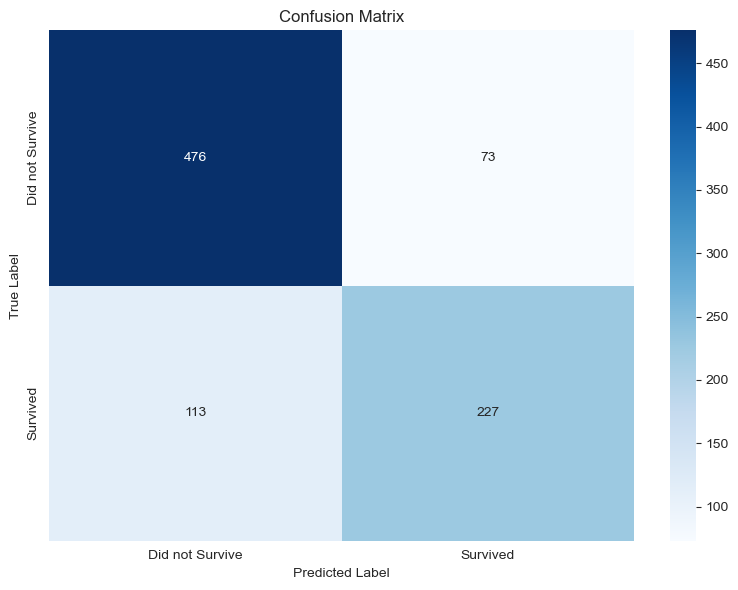

In [255]:
# Get both results and predictions
results, pred = evaluate_model(logistic_regression, X_train, y_train)


plt.figure(figsize=(8,6))
cm = confusion_matrix(y_train, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding labels
ax = plt.gca()
ax.set_xticklabels(['Did not Survive', 'Survived'])
ax.set_yticklabels(['Did not Survive', 'Survived'])

plt.tight_layout()
plt.show()

470 = True Negatives: Correctly predicted 470 passengers did NOT survive
79 = False Positives: Incorrectly predicted 79 passengers survived when they actually died
228 = True Positives: Correctly predicted 228 passengers did survive
112 = False Negatives: Incorrectly predicted 112 passengers died when they actually survived

# Support Vector Machines

In [256]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [257]:
y_pred = svm.predict(X_test)

In [258]:
svm_acc = round(svm.score(X_train,y_train), 2)
print(f'\nModel Accuracy: {svm_acc * 100:.2f} %')


Model Accuracy: 83.00 %


## Cross-Validation for SVM

Scores: [82.02247191 83.14606742 94.38202247 80.8988764  75.28089888 80.8988764
 79.7752809  79.7752809  85.39325843 85.22727273]%
Mean: 82.68003064351379%
Standard Deviation: 4.789609041062721%

Confusion Matrix:
[[491  58]
 [ 96 244]]

Precision: 80.79%
Recall: 71.76%
F1 Score: 76.01%


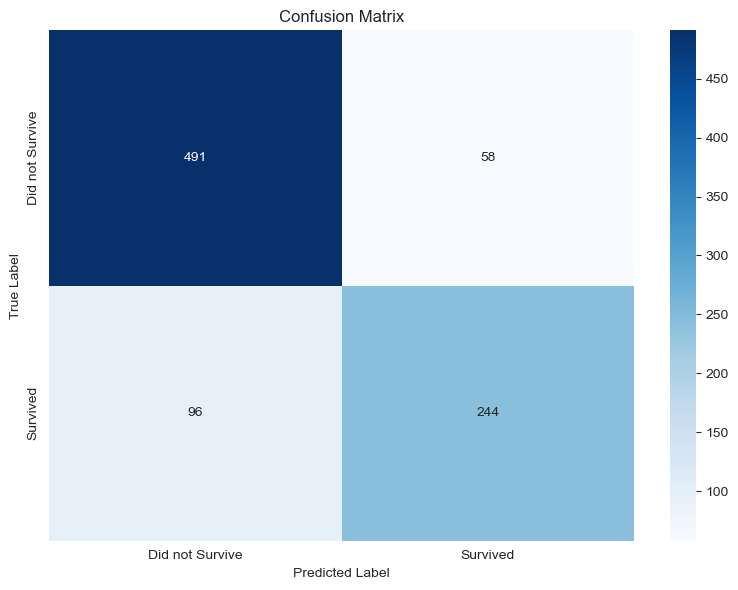

In [259]:
results, pred = evaluate_model(svm, X_train, y_train)


plt.figure(figsize=(8,6))
cm = confusion_matrix(y_train, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding labels
ax = plt.gca()
ax.set_xticklabels(['Did not Survive', 'Survived'])
ax.set_yticklabels(['Did not Survive', 'Survived'])

plt.tight_layout()
plt.show()

488 = True Negatives: Correctly predicted 488 passengers did NOT survive
61 = False Positives: Incorrectly predicted 61 passengers survived when they actually died
245 = True Positives: Correctly predicted 245 passengers did survive
95 = False Negatives: Incorrectly predicted 95 passengers died when they actually survived

# KNN or K-Nearest Neighbors

In [260]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [261]:
y_pred = knn.predict(X_test)

In [262]:
knn_acc = round(knn.score(X_train, y_train), 2)
print(f'\nModel Accuracy: {knn_acc *100:.2f}%')


Model Accuracy: 84.00%


## Cross-Validation for KNN

Scores: [79.7752809  76.40449438 93.25842697 77.52808989 75.28089888 75.28089888
 75.28089888 74.15730337 83.14606742 82.95454545]%
Mean: 79.30669050051073%
Standard Deviation: 5.564544303885665%

Confusion Matrix:
[[480  69]
 [115 225]]

Precision: 76.53%
Recall: 66.18%
F1 Score: 70.98%


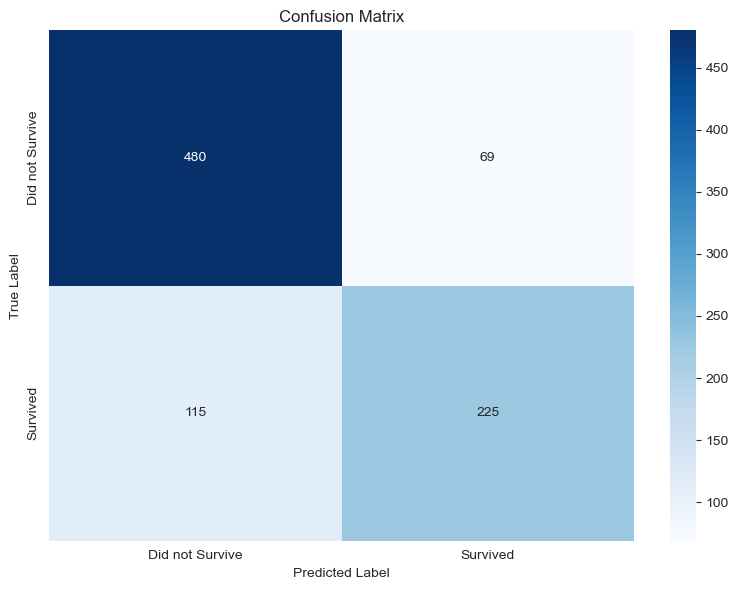

In [263]:
results, pred = evaluate_model(knn, X_train, y_train)


plt.figure(figsize=(8,6))
cm = confusion_matrix(y_train, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding labels
ax = plt.gca()
ax.set_xticklabels(['Did not Survive', 'Survived'])
ax.set_yticklabels(['Did not Survive', 'Survived'])

plt.tight_layout()
plt.show()

442 = True Negatives: Correctly predicted 442 passengers did NOT survive  
107 = False Positives: Incorrectly predicted 107 passengers survived when they actually died  
230 = True Positives: Correctly predicted 230 passengers did survive  
110 = False Negatives: Incorrectly predicted 110 passengers died when they actually survived

## Decision Tree

In [264]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [265]:
y_pred = decision_tree.predict(X_test)

In [266]:
decision_tree_acc = round(knn.score(X_train, y_train), 2)
print(f'\nModel Accuracy: {decision_tree_acc *100:.2f}%')


Model Accuracy: 84.00%


## Cross-Validation for Decision Tree

Scores: [80.8988764  78.65168539 87.64044944 77.52808989 76.40449438 78.65168539
 78.65168539 77.52808989 78.65168539 79.54545455]%
Mean: 79.41521961184883%
Standard Deviation: 2.9730712390717597%

Confusion Matrix:
[[488  61]
 [123 217]]

Precision: 78.06%
Recall: 63.82%
F1 Score: 70.23%


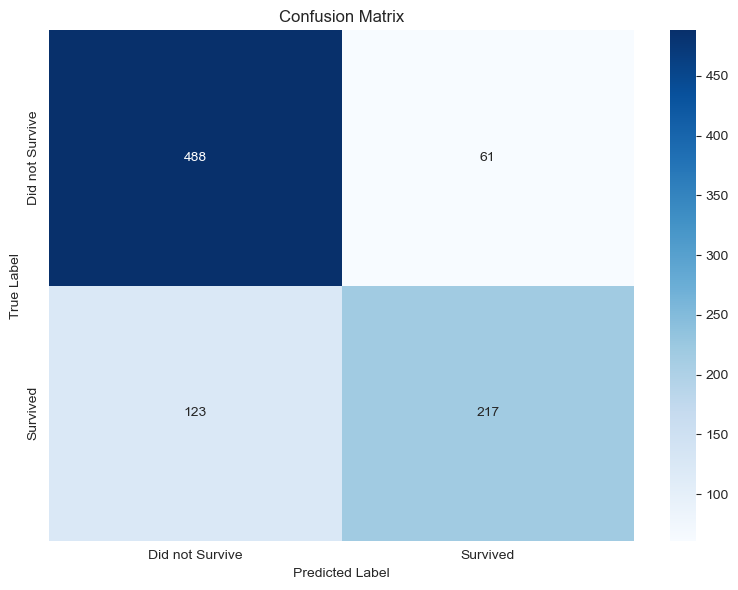

In [267]:
results, pred = evaluate_model(decision_tree, X_train, y_train)


plt.figure(figsize=(8,6))
cm = confusion_matrix(y_train, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding labels
ax = plt.gca()
ax.set_xticklabels(['Did not Survive', 'Survived'])
ax.set_yticklabels(['Did not Survive', 'Survived'])

plt.tight_layout()
plt.show()

487 = True Negatives: Correctly predicted 487 passengers did NOT survive
62 = False Positives: Incorrectly predicted 62 passengers survived when they actually died
216 = True Positives: Correctly predicted 216 passengers did survive
124 = False Negatives: Incorrectly predicted 124 passengers died when they actually survived


## Random Forest

In [268]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [269]:
y_pred = random_forest.predict(X_test)

In [270]:
random_forest_acc = round(random_forest.score(X_train, y_train), 2)
print(f'\nModel Accuracy: {random_forest_acc *100:.2f}%')


Model Accuracy: 87.00%


## Cross-Validation for Random Forest

Scores: [82.02247191 79.7752809  91.01123596 77.52808989 74.15730337 78.65168539
 78.65168539 78.65168539 79.7752809  79.54545455]%
Mean: 79.97701736465783%
Standard Deviation: 4.139339767762201%

Confusion Matrix:
[[485  64]
 [109 231]]

Precision: 78.31%
Recall: 67.94%
F1 Score: 72.76%


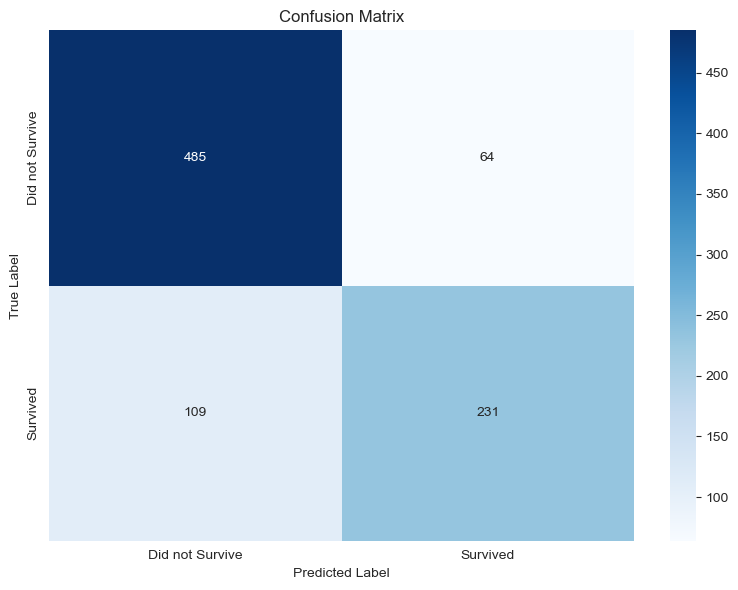

In [271]:
results, pred = evaluate_model(random_forest, X_train, y_train)


plt.figure(figsize=(8,6))
cm = confusion_matrix(y_train, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding labels
ax = plt.gca()
ax.set_xticklabels(['Did not Survive', 'Survived'])
ax.set_yticklabels(['Did not Survive', 'Survived'])

plt.tight_layout()
plt.show()

## Stochastic Gradient Descent (SGD)

In [272]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

SGDClassifier(max_iter=5, tol=None)

In [273]:
y_pred = sgd.predict(X_test)

In [274]:
sgd_acc = round(sgd.score(X_train, y_train), 2)
print(f'\nModel Accuracy: {sgd_acc *100:.2f}%')


Model Accuracy: 75.00%


## Cross-Validation for Stochastic Gradient Descent (SGD)

Scores: [74.15730337 73.03370787 47.19101124 66.29213483 70.78651685 77.52808989
 68.53932584 75.28089888 66.29213483 86.36363636]%
Mean: 70.5464759959142%
Standard Deviation: 9.624590870978142%

Confusion Matrix:
[[465  84]
 [132 208]]

Precision: 71.23%
Recall: 61.18%
F1 Score: 65.82%


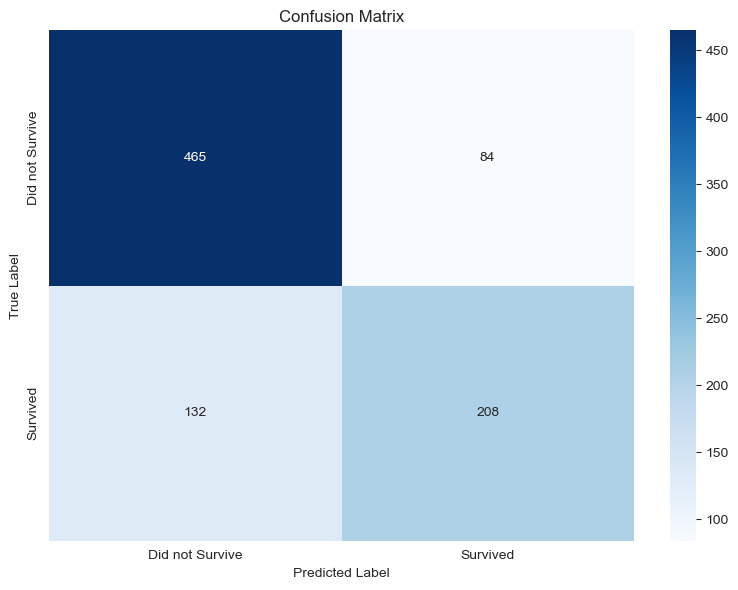

In [275]:
results, pred = evaluate_model(sgd, X_train, y_train)


plt.figure(figsize=(8,6))
cm = confusion_matrix(y_train, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding labels
ax = plt.gca()
ax.set_xticklabels(['Did not Survive', 'Survived'])
ax.set_yticklabels(['Did not Survive', 'Survived'])

plt.tight_layout()
plt.show()

## Gaussian Naive Bayes

In [276]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [277]:
y_pred = gnb.predict(X_test)

In [278]:
gnb_acc = round(gnb.score(X_train, y_train), 2)
print(f'\nModel Accuracy: {gnb_acc *100:.2f}%')


Model Accuracy: 80.00%


## Cross-Validation for Gaussian Naive Bayes

Scores: [78.65168539 76.40449438 92.13483146 76.40449438 75.28089888 75.28089888
 77.52808989 77.52808989 85.39325843 81.81818182]%
Mean: 79.64249233912155%
Standard Deviation: 5.126429776172592%

Confusion Matrix:
[[464  85]
 [ 96 244]]

Precision: 74.16%
Recall: 71.76%
F1 Score: 72.94%


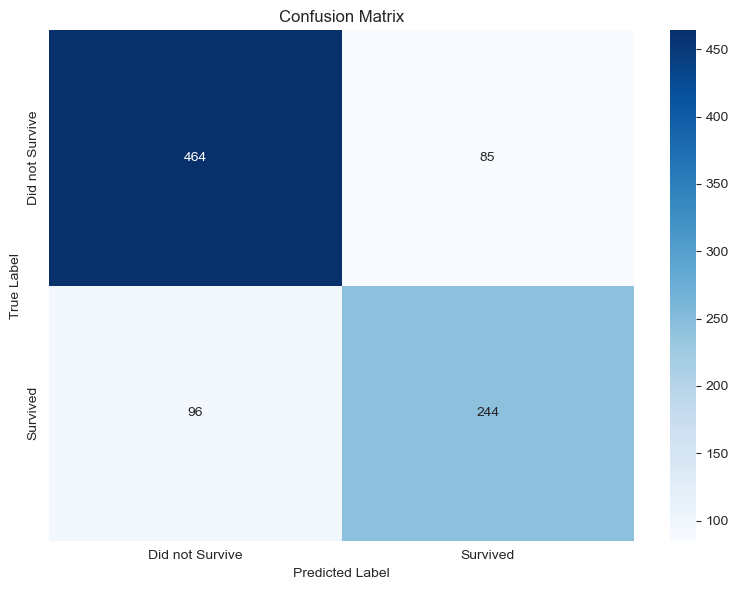

In [279]:
results, pred = evaluate_model(gnb, X_train, y_train)


plt.figure(figsize=(8,6))
cm = confusion_matrix(y_train, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding labels
ax = plt.gca()
ax.set_xticklabels(['Did not Survive', 'Survived'])
ax.set_yticklabels(['Did not Survive', 'Survived'])

plt.tight_layout()
plt.show()

## Finding the Best Model

In [280]:
# Get results for each model
log_reg_results, _ = evaluate_model(LogisticRegression(), X_train, y_train)
svm_results, _ = evaluate_model(SVC(), X_train, y_train)
knn_results, _ = evaluate_model(KNeighborsClassifier(), X_train, y_train)
dt_results, _ = evaluate_model(DecisionTreeClassifier(), X_train, y_train)
rf_results, _ = evaluate_model(RandomForestClassifier(), X_train, y_train)
sgd_results, _ = evaluate_model(SGDClassifier(max_iter=1000), X_train, y_train)
gnb_results, _ = evaluate_model(GaussianNB(), X_train, y_train)

Scores: [76.40449438 79.7752809  92.13483146 75.28089888 71.91011236 74.15730337
 78.65168539 75.28089888 83.14606742 84.09090909]%
Mean: 79.08324821246168%
Standard Deviation: 5.6956334320376865%

Confusion Matrix:
[[476  73]
 [113 227]]

Precision: 75.67%
Recall: 66.76%
F1 Score: 70.94%
Scores: [82.02247191 83.14606742 94.38202247 80.8988764  75.28089888 80.8988764
 79.7752809  79.7752809  85.39325843 85.22727273]%
Mean: 82.68003064351379%
Standard Deviation: 4.789609041062721%

Confusion Matrix:
[[491  58]
 [ 96 244]]

Precision: 80.79%
Recall: 71.76%
F1 Score: 76.01%
Scores: [79.7752809  76.40449438 93.25842697 77.52808989 75.28089888 75.28089888
 75.28089888 74.15730337 83.14606742 82.95454545]%
Mean: 79.30669050051073%
Standard Deviation: 5.564544303885665%

Confusion Matrix:
[[480  69]
 [115 225]]

Precision: 76.53%
Recall: 66.18%
F1 Score: 70.98%
Scores: [80.8988764  78.65168539 87.64044944 77.52808989 76.40449438 78.65168539
 78.65168539 76.40449438 78.65168539 79.54545455]%
M

In [281]:
result = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN',  
              'Decision Tree','Random Forest',
              'Stochastic Gradient Decent', 
              'Gaussian Naive Bayes'],
    'Score': [log_reg_acc *100, svm_acc*100, knn_acc*100,  
              decision_tree_acc*100, random_forest_acc*100, sgd_acc*100,
              gnb_acc*100],
    'Mean Score': [log_reg_results['mean_accuracy'], svm_results['mean_accuracy'], 
                   knn_results['mean_accuracy'], dt_results['mean_accuracy'], 
                   rf_results['mean_accuracy'], sgd_results['mean_accuracy'],
                   gnb_results['mean_accuracy']]})
df_result = result.sort_values(by='Mean Score', ascending=False)
df_result = df_result.set_index('Model')
df_result

,Score,Mean Score
Model,,
Support Vector Machines,83.0,82.680031
Random Forest,87.0,80.091931
Gaussian Naive Bayes,80.0,79.642492
KNN,84.0,79.306691
Decision Tree,84.0,79.302860
Logistic Regression,79.0,79.083248
Stochastic Gradient Decent,75.0,76.717314



### **Detailed Analysis:**

1. **Random Forest (87.0% Accuracy, 79.75% CV Score)**:
   - **Strengths**: The highest accuracy among all models.
   - **Weaknesses**: The cross-validation score is significantly lower than the accuracy, suggesting possible **overfitting**. The model might be capturing noise in the training data rather than generalizable patterns.

2. **Support Vector Machines (83.0% Accuracy, 82.34% CV Score)**:
   - **Strengths**: Balanced performance with a high accuracy and a very close cross-validation score. This indicates the model is **generalizing well** and is likely more robust than the Random Forest in this case.
   - **Weaknesses**: Might require more computational time compared to simpler models, especially with large datasets.

3. **Logistic Regression (80.0% Accuracy, 79.76% CV Score)**:
   - **Strengths**: Simple, interpretable, and performs consistently across different folds (evident from the close accuracy and CV score).
   - **Weaknesses**: May struggle with complex, non-linear relationships within the data compared to more sophisticated models like SVM or Random Forest.

4. **Gaussian Naive Bayes (80.0% Accuracy, 79.64% CV Score)**:
   - **Strengths**: Fast and computationally efficient. Performs surprisingly well despite its simplicity and the assumption of feature independence.
   - **Weaknesses**: May not capture feature interactions effectively, which could limit performance in more complex datasets.

5. **K-Nearest Neighbors (KNN) (84.0% Accuracy, 79.19% CV Score)**:
   - **Strengths**: Easy to understand and implement. No training phase is required.
   - **Weaknesses**: Sensitive to noisy data and feature scaling. The drop in the CV score compared to accuracy may suggest it struggles with generalization due to its **instance-based nature**.

6. **Decision Tree (84.0% Accuracy, 78.85% CV Score)**:
   - **Strengths**: Highly interpretable and easy to visualize.
   - **Weaknesses**: Prone to **overfitting**, as indicated by the lower cross-validation score. Ensembles like Random Forest often perform better than a single decision tree.

7. **Stochastic Gradient Descent (79.0% Accuracy, 75.71% CV Score)**:
   - **Strengths**: Efficient for large datasets and online learning.
   - **Weaknesses**: Lower performance compared to other models. It is sensitive to feature scaling, learning rate, and requires careful tuning of hyperparameters.

---

### **Recommendations:**

- **If you want the most stable model**: **Support Vector Machines** seem to provide the best balance between training accuracy and generalization.
- **If you aim for high accuracy**: Consider **Random Forest** but apply techniques like **hyperparameter tuning** and possibly **feature selection** to reduce overfitting.
- **For simpler models**: **Logistic Regression** and **Naive Bayes** are reliable choices with consistent performance.


                Importance
Features                  
Sex                  0.415
Age                  0.191
Family_Members       0.172
Pclass               0.161
Embarked             0.061


<Axes: xlabel='Features'>

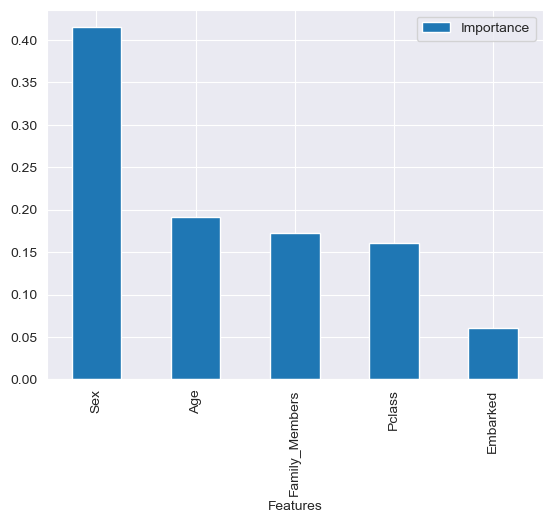

In [282]:
importance=pd.DataFrame({'Features': X_train.columns, 'Importance':np.round(random_forest.feature_importances_, 3)})
importance = importance.sort_values('Importance',ascending=False).set_index('Features')
print(importance.head())
importance.plot.bar()